## UNIVERSIDADE PRESBITERIANA MACKENZIE
#### Nome: Bianca Tieppo
#### TIA: 722.0865-1

## PIPELINE | DATASET DIGITS (NIST)
#### Estudo comparativo entre os modelos Árvores de decisão, KNN, Backpropagation, Perceptron no reconhecimento de dígitos.

In [1]:
# Importando as bibliotecas padrões
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importando os datasets e as bibliotecas de métricas de performance
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Importando as bibliotecas dos classificadores
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

### Importação do conjunto de dados

In [2]:
digits = datasets.load_digits()

### Estudo e pré-processamento dos dados carregados

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

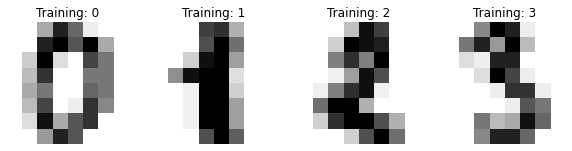

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#### O atributo 'images' do conjunto de dados armazena matrizes 8x8 com valores de escala de cinza. Para aplicar um classificador nesses dados, é necessário achatar as imagens, transformando as matrizes 2D com formato (8, 8) em uma matriz 1D de formato (64,).

In [5]:
# Achatamento da dimensão das imagens
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [6]:
# Divisão dos dados em 80% de dados de treinamento e 20% de dados de teste
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [7]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [8]:
X_test.shape, y_test.shape

((360, 64), (360,))

### Criação, treinamento e análise dos modelos

### SVC

In [9]:
# Criação do classificador Support Vector Classifier
svc = SVC(gamma=0.001)

# Treinamento do modelo a partir dos dados de treinamento
svc.fit(X_train, y_train)

# Predição a partir dos dados de teste
predicted_svc = svc.predict(X_test)

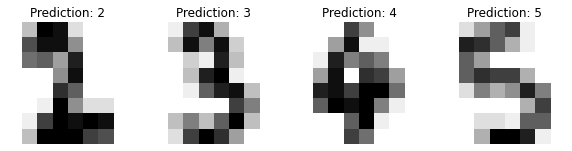

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted_svc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [11]:
print(
    f"Classification report for classifier {svc}:\n"
    f"{metrics.classification_report(y_test, predicted_svc)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


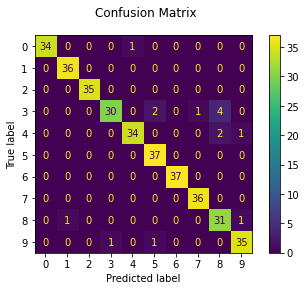

In [12]:
disp_svc = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_svc)
disp_svc.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_svc.confusion_matrix}")

plt.show()

In [13]:
print(svc.predict(digits.data[1791:1796]))
print(digits.target[1791:1796])

[4 9 0 8 9]
[4 9 0 8 9]


In [14]:
svc.score(X_test, y_test)

0.9583333333333334

### Árvore de Decisão

In [15]:
# Criação do classificador Árvore de Decisão
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')

# Treinamento do modelo a partir dos dados de treinamento
decision_tree.fit(X_train, y_train)

# Predição a partir dos dados de teste
predicted_dt = decision_tree.predict(X_test)

In [16]:
fn = digits.feature_names
cn = list(set(digits.target))
cn = list(map(str, cn))

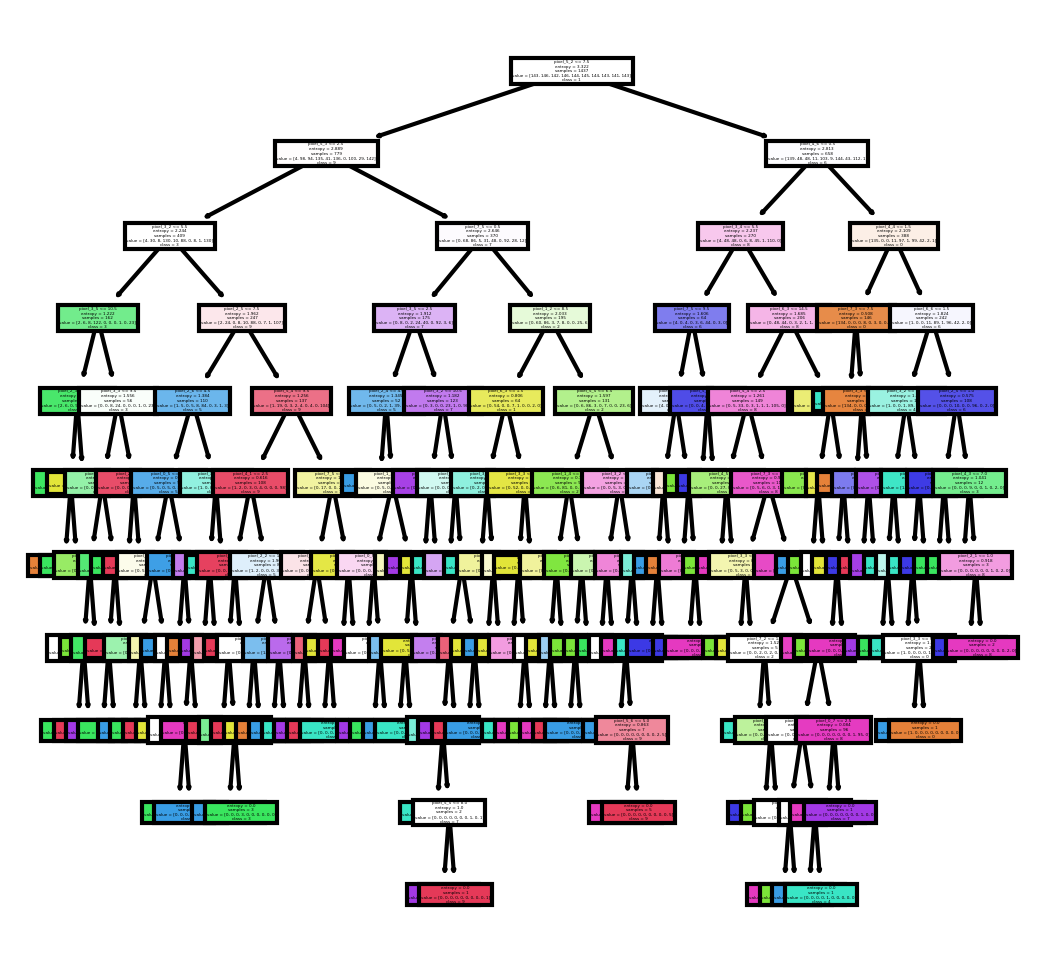

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(decision_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [18]:
print(
    f"Classification report for classifier {decision_tree}:\n"
    f"{metrics.classification_report(y_test, predicted_dt)}\n"
)

Classification report for classifier DecisionTreeClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        35
           1       0.69      0.61      0.65        36
           2       0.70      0.80      0.75        35
           3       0.71      0.54      0.62        37
           4       0.81      0.78      0.79        37
           5       0.80      0.89      0.85        37
           6       0.92      0.89      0.90        37
           7       0.73      0.83      0.78        36
           8       0.76      0.79      0.78        33
           9       0.72      0.70      0.71        37

    accuracy                           0.77       360
   macro avg       0.77      0.77      0.77       360
weighted avg       0.77      0.77      0.77       360




Confusion matrix:
[[31  0  0  0  1  0  3  0  0  0]
 [ 0 22  1  1  2  0  0  1  1  8]
 [ 1  2 28  0  0  1  0  3  0  0]
 [ 0  3  4 20  0  4  0  0  5  1]
 [ 2  0  1  0 29  0  0  4  0  1]
 [ 0  2  0  1  1 33  0  0  0  0]
 [ 0  1  1  0  2  0 33  0  0  0]
 [ 0  0  2  2  0  0  0 30  2  0]
 [ 0  1  3  0  0  2  0  1 26  0]
 [ 2  1  0  4  1  1  0  2  0 26]]


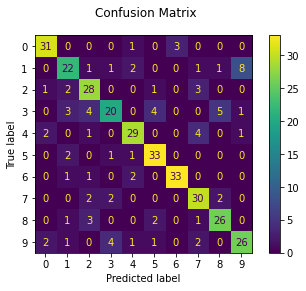

In [20]:
disp_dt = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_dt)
disp_dt.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_dt.confusion_matrix}")

plt.show()

In [21]:
print(decision_tree.predict(digits.data[1791:1796]))
print(digits.target[1791:1796])

[4 9 0 8 9]
[4 9 0 8 9]


In [22]:
decision_tree.score(X_test, y_test)

0.7722222222222223

In [23]:
# Criação de um novo modelo de Árvore de Decisão
decision_tree_cv = tree.DecisionTreeClassifier(criterion='entropy')

# Treinamento do modelo com cv igual a 5 
cv_scores = cross_val_score(decision_tree_cv, X_train, y_train, cv=5)

# Impressão de cada cv score (acurácia) e a média desse
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.78819444 0.80208333 0.77700348 0.81533101 0.77700348]
cv_scores mean: 0.7919231513743709


### KNN

In [24]:
# Criação de um modelo KNN
knn2 = KNeighborsClassifier()

# Criação de um dicionário com o intervalo de valores a serem testados para o parâmetro n_neighbors
param_grid = {'n_neighbors': np.arange(1, 5)}

# Utilização de GridSearch para testar os valores
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

# Treinamento do modelo a partir dos dados de treinamento
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [25]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [26]:
knn_gscv.best_score_

0.9728706929926441

In [27]:
# Criação do classificador KNN
knn = KNeighborsClassifier(n_neighbors=1)

# Treinamento do modelo a partir dos dados de treinamento
knn.fit(X_train, y_train)

# Predição a partir dos dados de teste
predicted_knn = knn.predict(X_test)

In [28]:
print(
    f"Classification report for classifier {knn}:\n"
    f"{metrics.classification_report(y_test, predicted_knn)}\n"
)

Classification report for classifier KNeighborsClassifier(n_neighbors=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      0.84      0.90        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.88      0.91        33
           9       0.87      0.92      0.89        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  2  0  1  2  1]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  0 29  1]
 [ 0  0  0  1  0  2  0  0  0 34]]


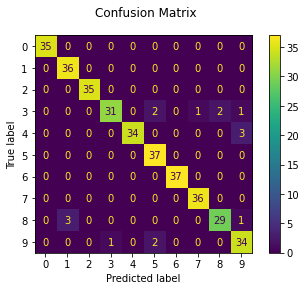

In [29]:
disp_knn = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_knn)
disp_knn.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_knn.confusion_matrix}")

plt.show()

In [30]:
print(knn.predict(digits.data[1791:1796]))
print(digits.target[1791:1796])

[4 9 0 8 9]
[4 9 0 8 9]


In [31]:
knn.score(X_test, y_test)

0.9555555555555556

In [32]:
# Criação de um novo modelo KNN
knn_cv = KNeighborsClassifier(n_neighbors=1)

# Treinamento do modelo com cv igual a 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

# Impressão de cada cv score (acurácia) e a média desses
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.94791667 0.98263889 0.9825784  0.96515679 0.98606272]
cv_scores mean:0.9728706929926441


### Backpropagation

In [33]:
# Criação do classificador MLP
mlp = MLPClassifier(solver='adam', max_iter=5000, learning_rate_init = 0.001, hidden_layer_sizes=(940,), random_state=1)

# Treinamento do modelo a partir dos dados de treinamento
mlp.fit(X_train, y_train)

# Predição a partir dos dados de teste
predicted_mlp = mlp.predict(X_test)

In [34]:
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, predicted_mlp)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(940,), max_iter=5000, random_state=1):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      0.73      0.84        37
           4       0.94      0.92      0.93        37
           5       0.93      1.00      0.96        37
           6       0.97      0.97      0.97        37
           7       0.95      0.97      0.96        36
           8       0.77      0.91      0.83        33
           9       0.89      0.92      0.91        37

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360




Confusion matrix:
[[33  0  0  0  1  0  1  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  2  0  1  7  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  2  0  0  1  0  0  0 30  0]
 [ 0  0  0  0  0  1  0  1  1 34]]


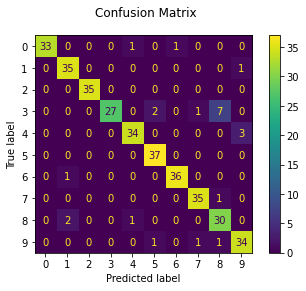

In [35]:
disp_mlp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_mlp)
disp_mlp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_mlp.confusion_matrix}")

plt.show()

In [36]:
print(mlp.predict(digits.data[1791:1796]))
print(digits.target[1791:1796])

[4 9 0 8 9]
[4 9 0 8 9]


In [37]:
mlp.score(X_test, y_test)

0.9333333333333333

In [38]:
# Criação de um novo modelo KNN
mlp_cv = MLPClassifier(solver='adam', max_iter=5000, learning_rate_init = 0.001, hidden_layer_sizes=(100,), random_state=1)

# Treinamento do modelo com cv igual a 5 
cv_scores = cross_val_score(mlp_cv, X_train, y_train, cv=5)

# Impressão de cada cv score (acurácia) e a média desses
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.92013889 0.93402778 0.91986063 0.96864111 0.95470383]
cv_scores mean:0.9394744483159118


### Perceptron

In [39]:
# Criação do classificador Perceptron
perceptron = Perceptron(tol=0.1, random_state=0)

# Treinamento do modelo a partir dos dados de treinamento
perceptron.fit(X_train, y_train)

# Predição a partir dos dados de teste
predicted_perceptron = perceptron.predict(X_test)

In [40]:
print(
    f"Classification report for classifier {perceptron}:\n"
    f"{metrics.classification_report(y_test, predicted_perceptron)}\n"
)

Classification report for classifier Perceptron(tol=0.1):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.56      0.86      0.68        36
           2       1.00      1.00      1.00        35
           3       0.96      0.68      0.79        37
           4       0.94      0.92      0.93        37
           5       0.97      0.92      0.94        37
           6       1.00      0.95      0.97        37
           7       0.94      0.89      0.91        36
           8       0.76      0.79      0.78        33
           9       0.83      0.81      0.82        37

    accuracy                           0.88       360
   macro avg       0.90      0.88      0.88       360
weighted avg       0.90      0.88      0.88       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  1  0  0  0  0  0  4]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  6  0 25  0  1  0  1  4  0]
 [ 0  2  0  0 34  0  0  0  0  1]
 [ 0  3  0  0  0 34  0  0  0  0]
 [ 0  2  0  0  0  0 35  0  0  0]
 [ 0  2  0  0  0  0  0 32  2  0]
 [ 0  5  0  0  1  0  0  0 26  1]
 [ 0  4  0  0  0  0  0  1  2 30]]


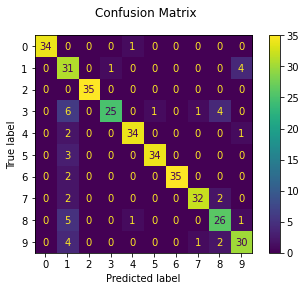

In [41]:
disp_perceptron = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_perceptron)
disp_perceptron.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_perceptron.confusion_matrix}")

plt.show()

In [42]:
print(perceptron.predict(digits.data[1791:1796]))
print(digits.target[1791:1796])

[4 9 0 8 9]
[4 9 0 8 9]


In [43]:
perceptron.score(X_test, y_test)

0.8777777777777778

In [44]:
# Criação de um novo modelo KNN
perceptron_cv = Perceptron(tol=0.1, random_state=0)

# Treinamento do modelo com cv igual a 5 
cv_scores = cross_val_score(perceptron_cv, X_train, y_train, cv=5)

# Impressão de cada cv score (acurácia) e a média desses
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.91319444 0.92013889 0.90940767 0.92682927 0.93379791]
cv_scores mean:0.9206736353077817
